<a href="https://colab.research.google.com/github/aruntakhur/FDP/blob/main/FDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

     |████████████████████████████████| 298 kB 5.0 MB/s 
     |████████████████████████████████| 243 kB 42.2 MB/s 
     |████████████████████████████████| 61 kB 476 kB/s 
     |████████████████████████████████| 132 kB 44.1 MB/s 
     |████████████████████████████████| 1.1 MB 38.3 MB/s 
     |████████████████████████████████| 192 kB 45.1 MB/s 
     |████████████████████████████████| 271 kB 69.6 MB/s 
     |████████████████████████████████| 160 kB 59.8 MB/s 


In [2]:
import datasets

In [3]:
from datasets import list_datasets
datasets = list_datasets()
print(f"There are {len(datasets)} datasets currently available on the Hub.")
print(f"The first 10 are: {datasets[:10]}")

There are 2239 datasets currently available on the Hub.
The first 10 are: ['0n1xus/codexglue', '0n1xus/pytorrent-standalone', 'AConsApart/anime_subtitles_DialoGPT', 'AI-Sweden/SuperLim', 'AI-Sweden/super_glue_sv', 'AI-it/korean-hate-speech', 'ARKseal/YFCC14M_subset_webdataset', 'ARTeLab/fanpage', 'ARTeLab/ilpost', 'ARTeLab/mlsum-it']


In [4]:
metadata = list_datasets(with_details=True)[datasets.index("emotion")]
# Show dataset description
print("Description:", metadata.description, "\n")
# Show first 8 lines of the citation string
print("Citation:", "\n".join(metadata.citation.split("\n")[:8]))

Description: Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper. 

Citation: @inproceedings{saravia-etal-2018-carer,
    title = "{CARER}: Contextualized Affect Representations for Emotion Recognition",
    author = "Saravia, Elvis  and
      Liu, Hsien-Chi Toby  and
      Huang, Yen-Hao  and
      Wu, Junlin  and
      Chen, Yi-Shin",
    booktitle = "Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing",


In [5]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
train_ds[0]

{'label': 0, 'text': 'i didnt feel humiliated'}

In [9]:
labels = set(train_ds['label'])
labels

{0, 1, 2, 3, 4, 5}

In [10]:
train_ds.column_names

['text', 'label']

In [11]:
train_ds.features

{'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None),
 'text': Value(dtype='string', id=None)}

In [12]:
train_ds[:5]

{'label': [0, 0, 3, 2, 3],
 'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy']}

In [13]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]


In [14]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [15]:
def label_int2str(row, split):
    return emotions[split].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str, split="train")

In [16]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [17]:
emotions["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [18]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
#display_df(df.head(), index=None)

In [19]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [20]:
def label_int2str(row, split):
    return emotions[split].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str, split="train")

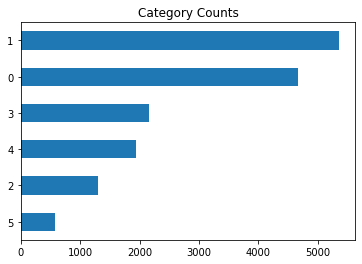

In [21]:
import matplotlib.pyplot as plt

df["label"].value_counts(ascending=True).plot.barh()
plt.title("Category Counts");

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


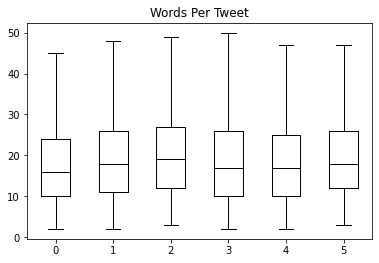

In [22]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by='label', grid=False, showfliers=False,
           color='black', )
plt.suptitle("")
plt.xlabel("");

Tokenization

In [23]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [24]:
token2idx = {}
for idx, unique_char in enumerate(set(tokenized_text)):
    token2idx[unique_char] = idx
print(token2idx)

{'k': 0, 's': 1, 'e': 2, 'N': 3, 'f': 4, 'c': 5, 'z': 6, 't': 7, 'x': 8, 'a': 9, 'i': 10, 'P': 11, 'T': 12, ' ': 13, 'o': 14, 'g': 15, 'r': 16, 'L': 17, '.': 18, 'n': 19}


In [25]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)
print(len(input_ids))
print(set(input_ids))

[12, 14, 0, 2, 19, 10, 6, 10, 19, 15, 13, 7, 2, 8, 7, 13, 10, 1, 13, 9, 13, 5, 14, 16, 2, 13, 7, 9, 1, 0, 13, 14, 4, 13, 3, 17, 11, 18]
38
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [26]:
import torch

input_ids = torch.tensor(input_ids)
one_hot_encodings = torch.nn.functional.one_hot(input_ids)
one_hot_encodings.shape

torch.Size([38, 20])

Word Tokenization

In [27]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [28]:
# Installing librarires
!pip install transformers sentencepiece -q

     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 28.1 MB/s 
     |████████████████████████████████| 895 kB 56.4 MB/s 
     |████████████████████████████████| 3.3 MB 43.7 MB/s 


In [29]:
from transformers import pipeline

In [30]:
pipe = pipeline(task = 'text2text-generation', model = 'facebook/m2m100_418M')

Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.80G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/272 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.54M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

In [31]:
pipe("How are you", forced_bos_token_id = pipe.tokenizer.get_lang_id("hi"))

[{'generated_text': 'आप कैसे हैं'}]

In [32]:
for str in df['text'][:5]:
  print(str,pipe(str, forced_bos_token_id = pipe.tokenizer.get_lang_id("hi")))

i didnt feel humiliated [{'generated_text': 'मुझे अपमानित महसूस नहीं हुआ'}]
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake [{'generated_text': 'मैं इतनी निराशाजनक महसूस से इतनी निराशाजनक आशा से बाहर निकल सकता हूं बस किसी ऐसे व्यक्ति के आसपास होने से जो देखभाल करता है और जागता है'}]
im grabbing a minute to post i feel greedy wrong [{'generated_text': 'मैं पोस्ट करने के लिए एक मिनट पकड़ता हूं मैं ग्रेडी गलत महसूस करता हूं'}]
i am ever feeling nostalgic about the fireplace i will know that it is still on the property [{'generated_text': 'मैं कभी भी फायरप्लेस के बारे में निराशाजनक महसूस करता हूं मैं जानता हूं कि यह अभी भी संपत्ति पर है'}]
i am feeling grouchy [{'generated_text': 'मैं ग्रोचियस महसूस करता हूं'}]
